In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

In [2]:
df=pd.read_csv(R'C:\Users\vaish\OneDrive\Desktop\adult.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.columns=['Age','Workclass','Fnlwgt','Education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']
df.head()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
d=df.drop(['Workclass','Education','marital_status','occupation','relationship','race','sex','native_country'],axis=1)

In [7]:
x=d.iloc[:,:-1]
y=d.iloc[:,-1]
print(x.shape)
print(y.shape)

(32561, 6)
(32561,)


In [8]:
x.head()

,Age,Fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [9]:
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: income, dtype: object

In [10]:
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.25)
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(x_te.shape)

(24420, 6)
(8141, 6)
(24420,)
(8141, 6)


## Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
m1=RandomForestClassifier(n_estimators=50,criterion='gini',max_depth=5,min_samples_split=10)
m1.fit(x_tr,y_tr)

RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=50)

In [33]:
print('Training score',m1.score(x_tr,y_tr))
print('Testing score',m1.score(x_te,y_te))

Training score 0.8335790335790336
Testing score 0.8295049748188184


In [34]:
ypred_m1=m1.predict(x_te)
print(ypred_m1)

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


In [35]:
print(confusion_matrix(y_te,ypred_m1))
print(classification_report(y_te,ypred_m1))

[[5937  282]
 [1106  816]]
              precision    recall  f1-score   support

       <=50K       0.84      0.95      0.90      6219
        >50K       0.74      0.42      0.54      1922

    accuracy                           0.83      8141
   macro avg       0.79      0.69      0.72      8141
weighted avg       0.82      0.83      0.81      8141



In [36]:
from sklearn import tree

In [37]:
fn=x_tr.columns
cn=['0','1']
print(fn)
print(cn)

Index(['Age', 'Fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')
['0', '1']


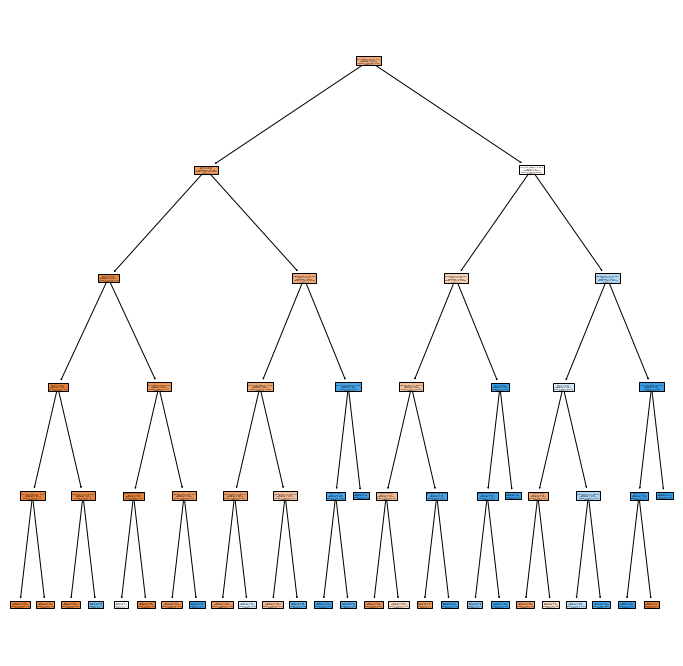

In [38]:
plt.figure(figsize=(12,12))
tree.plot_tree(m1.estimators_[0],feature_names=fn,class_names=cn,filled=True)
plt.show()

## Decision Tree Classifier

In [39]:
m2=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_split=10)
m2.fit(x_tr,y_tr)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=10)

In [40]:
print('Training score',m2.score(x_tr,y_tr))
print('Testing score',m2.score(x_te,y_te))

Training score 0.7998361998361998
Testing score 0.8044466281783564


In [41]:
ypred_m2=m2.predict(x_te)
print(ypred_m2)

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


In [42]:
print(confusion_matrix(y_te,ypred_m2))
print(classification_report(y_te,ypred_m2))

[[6215    4]
 [1588  334]]
              precision    recall  f1-score   support

       <=50K       0.80      1.00      0.89      6219
        >50K       0.99      0.17      0.30      1922

    accuracy                           0.80      8141
   macro avg       0.89      0.59      0.59      8141
weighted avg       0.84      0.80      0.75      8141



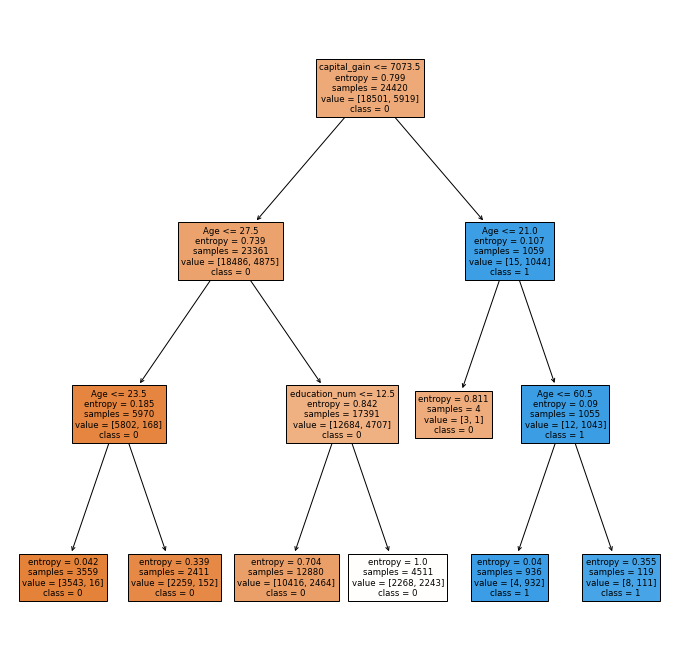

In [43]:
plt.figure(figsize=(12,12))
tree.plot_tree(m2,feature_names=fn,class_names=cn,filled=True)
plt.show()

## Logistic Regression

In [44]:
m3 = LogisticRegression(solver='liblinear')
m3.fit(x_tr,y_tr)

LogisticRegression(solver='liblinear')

In [45]:
print('Training score',m3.score(x_tr,y_tr))
print('Testing score',m3.score(x_te,y_te))

Training score 0.797051597051597
Testing score 0.7997788969414077


In [46]:
ypred_m3 = m3.predict(x_te)
print(ypred_m3)

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


In [47]:
print(confusion_matrix(y_te,ypred_m3))
print(classification_report(y_te,ypred_m3))

[[6018  201]
 [1429  493]]
              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88      6219
        >50K       0.71      0.26      0.38      1922

    accuracy                           0.80      8141
   macro avg       0.76      0.61      0.63      8141
weighted avg       0.79      0.80      0.76      8141



## KNN Classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
m4=KNeighborsClassifier(n_neighbors=17)
m4.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=17)

In [50]:
print('Training score',m4.score(x_tr,y_tr))
print('Testing score',m4.score(x_te,y_te))

Training score 0.8054873054873055
Testing score 0.8003930721041641


In [51]:
ypred_m4=m4.predict(x_te)
print(ypred_m4)

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


In [52]:
print(confusion_matrix(y_te,ypred_m4))
print(classification_report(y_te,ypred_m4))

[[6095  124]
 [1501  421]]
              precision    recall  f1-score   support

       <=50K       0.80      0.98      0.88      6219
        >50K       0.77      0.22      0.34      1922

    accuracy                           0.80      8141
   macro avg       0.79      0.60      0.61      8141
weighted avg       0.80      0.80      0.75      8141



## SVC Classifier

In [11]:
from sklearn.svm import SVC

In [15]:
m5 = SVC(kernel='rbf',gamma=0.1)
m5.fit(x_tr,y_tr)

SVC(gamma=0.1)

In [16]:
print('Training score',m5.score(x_tr,y_tr))
print('Testing score',m5.score(x_te,y_te))

Training score 0.9923832923832924
Testing score 0.7630512222085739


In [17]:
ypred_m5 = m5.predict(x_te)
print(ypred_m5)

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


In [18]:
print(confusion_matrix(y_te,ypred_m5))
print(classification_report(y_te,ypred_m5))

[[6185   34]
 [1895   27]]
              precision    recall  f1-score   support

       <=50K       0.77      0.99      0.87      6219
        >50K       0.44      0.01      0.03      1922

    accuracy                           0.76      8141
   macro avg       0.60      0.50      0.45      8141
weighted avg       0.69      0.76      0.67      8141



In [20]:
m6 = SVC(kernel='linear',C=1)
m6.fit(x_tr,y_tr)

SVC(C=1, kernel='linear')

In [21]:
print('Training score',m6.score(x_tr,y_tr))
print('Testing score',m6.score(x_te,y_te))

Training score 0.7945945945945946
Testing score 0.7971993612578308


In [22]:
ypred_m6 = m6.predict(x_te)
print(ypred_m6)

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


In [23]:
print(confusion_matrix(y_te,ypred_m6))
print(classification_report(y_te,ypred_m6))

[[5931  288]
 [1363  559]]
              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.88      6219
        >50K       0.66      0.29      0.40      1922

    accuracy                           0.80      8141
   macro avg       0.74      0.62      0.64      8141
weighted avg       0.78      0.80      0.77      8141



## Predictions

In [40]:
y_pred_m1=m1.predict(x_te)
print(y_pred_m1)

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' >50K' ' <=50K']


In [41]:
y_pred_m2=m2.predict(x_te)
print(y_pred_m2)

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' >50K' ' <=50K']


In [42]:
y_pred_m3=m3.predict(x_te)
print(y_pred_m3)

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' >50K' ' <=50K']


In [43]:
y_pred_m4=m4.predict(x_te)
print(y_pred_m4)

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' >50K' ' <=50K']


In [24]:
y_pred_m6=m6.predict(x_te)
print(y_pred_m6)

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


In [53]:
print('RFC',m1.score(x_te,y_te))
print('DTC',m2.score(x_te,y_te))
print('LogReg',m3.score(x_te,y_te))
print('KNN',m4.score(x_te,y_te))
print('SVC',m6.score(x_te,y_te))

RFC 0.8295049748188184
DTC 0.8044466281783564
LogReg 0.7997788969414077
KNN 0.8003930721041641
SVC 0.7971993612578308


In [54]:
from sklearn.metrics import precision_score,accuracy_score

In [59]:
print('RFC Precision',precision_score(y_te,ypred_m1,average='macro'))
print('DTC Precision',precision_score(y_te,ypred_m2,average='macro'))
print('LogReg Precision',precision_score(y_te,ypred_m3,average='macro'))
print('KNN Precision',precision_score(y_te,ypred_m4,average='macro'))
print('SVC Precision',precision_score(y_te,y_pred_m6,average='macro'))

RFC Precision 0.7930670223273273
DTC Precision 0.8923271052629584
LogReg Precision 0.7592426441763873
KNN Precision 0.7874365310569058
SVC Precision 0.7365552350284509


In [62]:
print('RFC Accuracy',accuracy_score(y_te,ypred_m1))
print('DTC Accuracy',accuracy_score(y_te,ypred_m2))
print('LogReg Accuracy',accuracy_score(y_te,ypred_m3))
print('KNN Accuracy',accuracy_score(y_te,ypred_m4))
print('SVC Accuracy',accuracy_score(y_te,y_pred_m6))

RFC Accuracy 0.8295049748188184
DTC Accuracy 0.8044466281783564
LogReg Accuracy 0.7997788969414077
KNN Accuracy 0.8003930721041641
SVC Accuracy 0.7971993612578308


# From all the above models we can say that Random Forest Classifier reported the best accuracy that is of 83%. 
## Thus we can conclude that Random Forest Classifier is the best model for this dataset
### Also from the above prediction results we can observe that the income of all adults was 50k and more, which according to the models is 83% accurate depending on the factors.